In [1]:
!git clone https://github.com/alsombra/Mask_RCNN-TF2  # updated repository

Cloning into 'Mask_RCNN-TF2'...
remote: Enumerating objects: 1004, done.
remote: Total 1004 (delta 0), reused 0 (delta 0), pack-reused 1004
Receiving objects: 100% (1004/1004), 137.72 MiB | 11.76 MiB/s, done.
Resolving deltas: 100% (588/588), done.
Updating files: 100% (76/76), done.


In [2]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [3]:
pwd

'/content/Mask_RCNN-TF2'

In [4]:
!pip install -r requirements.txt

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 9.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 20.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 123.4/123.4 kB 16.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 83.9/83.9 kB 9.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 93.5/93.5 kB 11.2 MB/s eta 0:00:00


In [5]:
!python setup.py install

/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separated 'description-file' will not be supported in future
        versions. Please use the underscore name 'description_file' instead.

        This deprecation is overdue, please update your project and remove deprecated
        calls to avoid build errors in the future.

        See https://setuptools.pypa.io/en/latest/userguide/declarative_config.html for details.
        ********************************************************************************

!!
  opt = self.warn_dash_deprecation(opt, section)
/usr/local/lib/python3.10/dist-packages/setuptools/dist.py:755: SetuptoolsDeprecationWarning: Invalid dash-separated options
!!

        ********************************************************************************
        Usage of dash-separ

In [6]:
%cd ..

/content


In [7]:
pwd

'/content'

In [1]:
!pip install numpy==1.23.1

In [2]:
import os
import sys
import cv2
import numpy as np
import skimage.io
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt

In [3]:
np.__version__

'1.23.1'

In [4]:
import tensorflow as tf

In [5]:
tf.__version__

'2.15.0'

In [6]:
ROOT_DIR = os.path.abspath('./Mask_RCNN-TF2')
ROOT_DIR

'/content/Mask_RCNN-TF2'

In [7]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython']

In [8]:
sys.path.append(ROOT_DIR)

In [9]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2']

In [10]:
from mrcnn import utils
from mrcnn import visualize
import mrcnn.model as modellib

In [11]:
# https://cocodataset.org/#home
sys.path.append(os.path.join(ROOT_DIR, 'samples/coco/'))


In [12]:
sys.path

['/content',
 '/env/python',
 '/usr/lib/python310.zip',
 '/usr/lib/python3.10',
 '/usr/lib/python3.10/lib-dynload',
 '',
 '/usr/local/lib/python3.10/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg',
 '/usr/lib/python3/dist-packages',
 '/usr/local/lib/python3.10/dist-packages/IPython/extensions',
 '/root/.ipython',
 '/content/Mask_RCNN-TF2',
 '/',
 '/content/Mask_RCNN-TF2/samples/coco/']

In [13]:
import coco

In [14]:
coco

<module 'coco' from '/content/Mask_RCNN-TF2/samples/coco/coco.py'>

In [15]:
MODEL_DIR = os.path.join(ROOT_DIR, 'logs')
IMAGE_DIR = os.path.join(ROOT_DIR, 'images')

In [16]:
MODEL_DIR, IMAGE_DIR

('/content/Mask_RCNN-TF2/logs', '/content/Mask_RCNN-TF2/images')

### [ ! ] Compatibility Update
Run the 5 lines below so we don't have any issues when running with the latest versions of Tensorflow

In [17]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession
config = ConfigProto()
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

## Loading the pre-trained neural network

In [18]:
COCO_MODEL_PATH = os.path.join(ROOT_DIR, 'mask_rcnn_coco.h5')

In [19]:
utils.download_trained_weights(COCO_MODEL_PATH)

... done downloading pretrained model!


In [20]:
class InferenceConfig(coco.CocoConfig):
  GPU_COUNT = 1
  IMAGES_PER_GPU = 1

In [21]:
utils

<module 'mrcnn.utils' from '/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg/mrcnn/utils.py'>

In [22]:
config = InferenceConfig()


In [23]:
config.display()


Configurations:
BACKBONE                       resnet101
BACKBONE_STRIDES               [4, 8, 16, 32, 64]
BATCH_SIZE                     1
BBOX_STD_DEV                   [0.1 0.1 0.2 0.2]
COMPUTE_BACKBONE_SHAPE         None
DETECTION_MAX_INSTANCES        100
DETECTION_MIN_CONFIDENCE       0.7
DETECTION_NMS_THRESHOLD        0.3
FPN_CLASSIF_FC_LAYERS_SIZE     1024
GPU_COUNT                      1
GRADIENT_CLIP_NORM             5.0
IMAGES_PER_GPU                 1
IMAGE_CHANNEL_COUNT            3
IMAGE_MAX_DIM                  1024
IMAGE_META_SIZE                93
IMAGE_MIN_DIM                  800
IMAGE_MIN_SCALE                0
IMAGE_RESIZE_MODE              square
IMAGE_SHAPE                    [1024 1024    3]
LEARNING_MOMENTUM              0.9
LEARNING_RATE                  0.001
LOSS_WEIGHTS                   {'rpn_class_loss': 1.0, 'rpn_bbox_loss': 1.0, 'mrcnn_class_loss': 1.0, 'mrcnn_bbox_loss': 1.0, 'mrcnn_mask_loss': 1.0}
MASK_POOL_SIZE                 14
MASK_SHAPE         

In [24]:
MODEL_DIR

'/content/Mask_RCNN-TF2/logs'

In [25]:
network = modellib.MaskRCNN(mode='inference', model_dir=MODEL_DIR, config=config)

Instructions for updating:
Use fn_output_signature instead


In [26]:
network.load_weights(COCO_MODEL_PATH, by_name=True)

## Detecting objects

In [27]:
class_names = ['BG', 'person', 'bicycle', 'car', 'motorcycle', 'airplane',
               'bus', 'train', 'truck', 'boat', 'traffic light',
               'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird',
               'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear',
               'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie',
               'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
               'kite', 'baseball bat', 'baseball glove', 'skateboard',
               'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup',
               'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple',
               'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
               'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed',
               'dining table', 'toilet', 'tv', 'laptop', 'mouse', 'remote',
               'keyboard', 'cell phone', 'microwave', 'oven', 'toaster',
               'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors',
               'teddy bear', 'hair drier', 'toothbrush']

In [28]:
len(class_names)

81

In [29]:
class_names[1], class_names.index('person')

('person', 1)

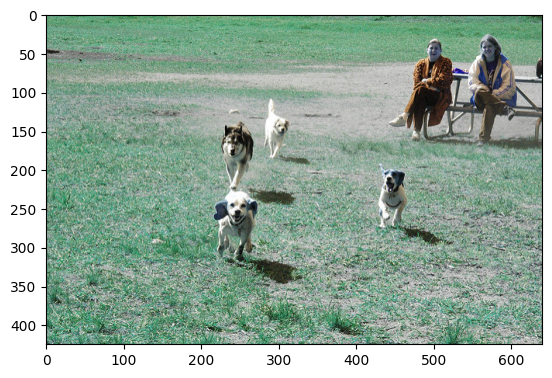

In [30]:
image2 = cv2.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg')
plt.imshow(image2); # BGR

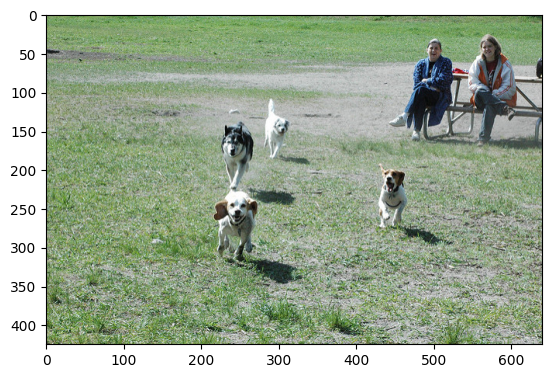

In [31]:
image = skimage.io.imread('/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg') # RGB
plt.imshow(image);

In [32]:
class_names[17], class_names[1], class_names[14]

('dog', 'person', 'bench')

In [33]:
results = network.detect([image], verbose=0)
results

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training_v1.py:2359: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates=self.state_updates,


[{'rois': array([[195, 426, 277, 467],
         [226, 216, 321, 273],
         [106, 280, 189, 314],
         [ 32, 445, 159, 527],
         [136, 225, 231, 268],
         [ 27, 541, 168, 607],
         [ 75, 476, 164, 634]], dtype=int32),
  'class_ids': array([17, 17, 17,  1, 17,  1, 14], dtype=int32),
  'scores': array([0.9997004 , 0.9996582 , 0.9996049 , 0.99913245, 0.99799263,
         0.997436  , 0.9165011 ], dtype=float32),
  'masks': array([[[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          ...,
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False]],
  
         [[False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
          [False, False, False, ..., False, False, False],
       

In [34]:
r = results[0]

In [35]:
visualize.display_instances(image, r['rois'], r['masks'],
                            r['class_ids'], class_names, r['scores'])

Output hidden; open in https://colab.research.google.com to view.

In [36]:
r.keys()

dict_keys(['rois', 'class_ids', 'scores', 'masks'])

## Removing the background

In [37]:
np.unique(r['masks'], return_counts=True)

(array([False,  True]), array([1881592,   22408]))

In [38]:
r['masks']

array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, Fal

In [39]:
r['masks'].shape #total 7 masks

(425, 640, 7)

In [40]:
def segment(image, r, index):
  mask = r['masks'][:,:,index]
  #print(mask)
  #print(mask.shape)

  mask = np.stack((mask,) * 3, axis = -1)
  #print(mask)
  #print(mask.shape)

  mask = mask.astype('uint8')
  #print(mask)
  bg = 255 - mask * 255
  #print(mask, mask.min(), mask.max())

  mask_show = np.invert(bg)
  #print(mask_show)
  mask_img = image * mask
  #print(mask_img)

  result = mask_img + bg
  return result, mask_show

In [41]:
image.shape, 425 * 640

((425, 640, 3), 272000)

In [42]:
segmentation, mask_obj = segment(image, r, 0)

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]], dtype=uint8)
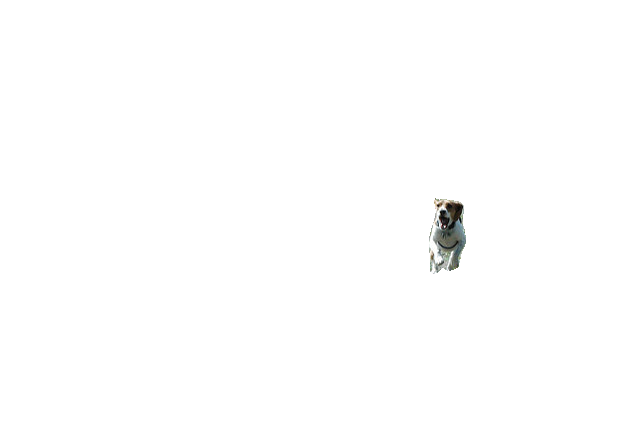

In [43]:
segmentation

array([[[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       ...,

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]],

       [[0, 0, 0],
        [0, 0, 0],
        [0, 0, 0],
        ...,
        [0, 0, 0],
        [0, 0, 0],
        [0, 0, 0]]], dtype=uint8)
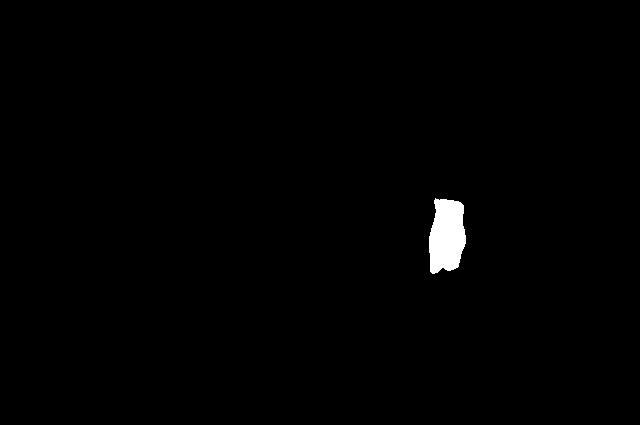

In [44]:
mask_obj

In [45]:
def show_segment(image, r, index, show_mask = False):
  segmentation, mask_obj = segment(image, r, index)
  plt.subplots(1, figsize=(16,16))
  plt.axis('off')
  if show_mask == True:
    plt.imshow(np.concatenate([mask_obj, segmentation], axis = 1))
  else:
    plt.imshow(np.concatenate([image, segmentation], axis = 1))

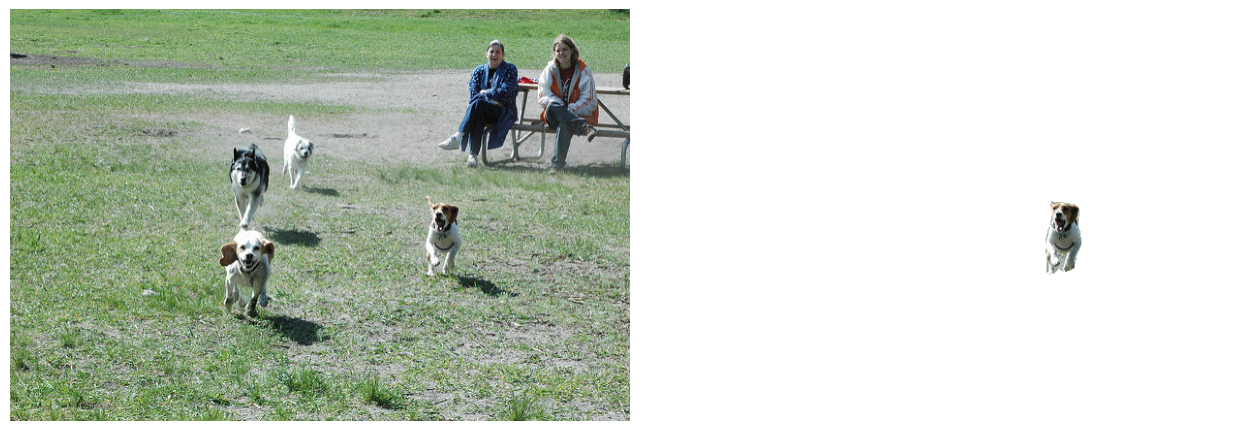

In [46]:
show_segment(image, r, 0, False)

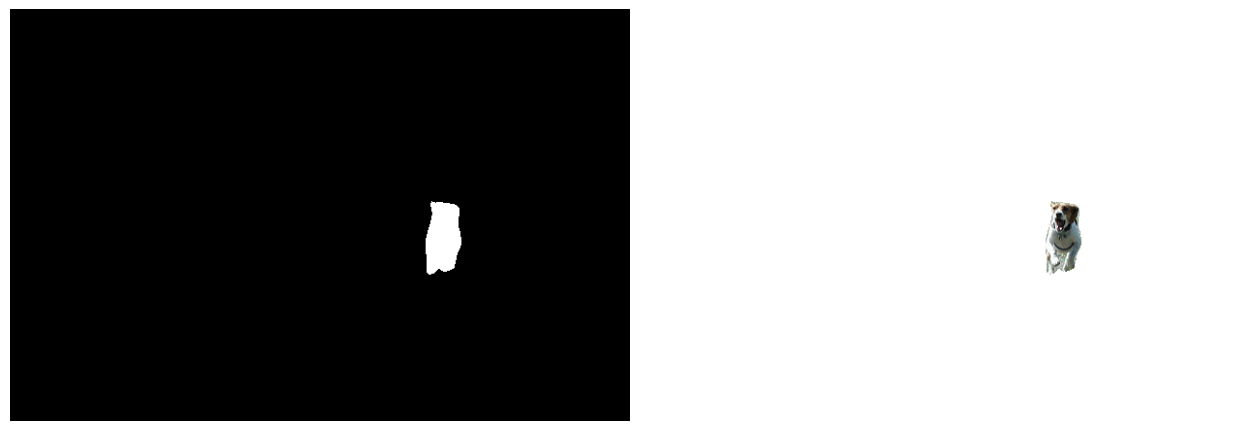

In [47]:
show_segment(image, r, 0, True)

In [48]:
r['rois'], len(r['rois'])

(array([[195, 426, 277, 467],
        [226, 216, 321, 273],
        [106, 280, 189, 314],
        [ 32, 445, 159, 527],
        [136, 225, 231, 268],
        [ 27, 541, 168, 607],
        [ 75, 476, 164, 634]], dtype=int32),
 7)

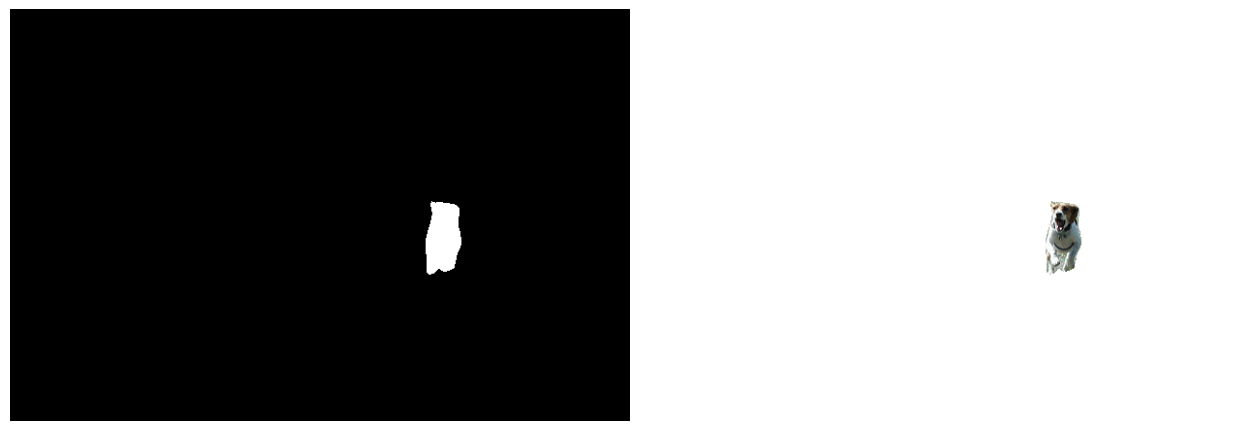

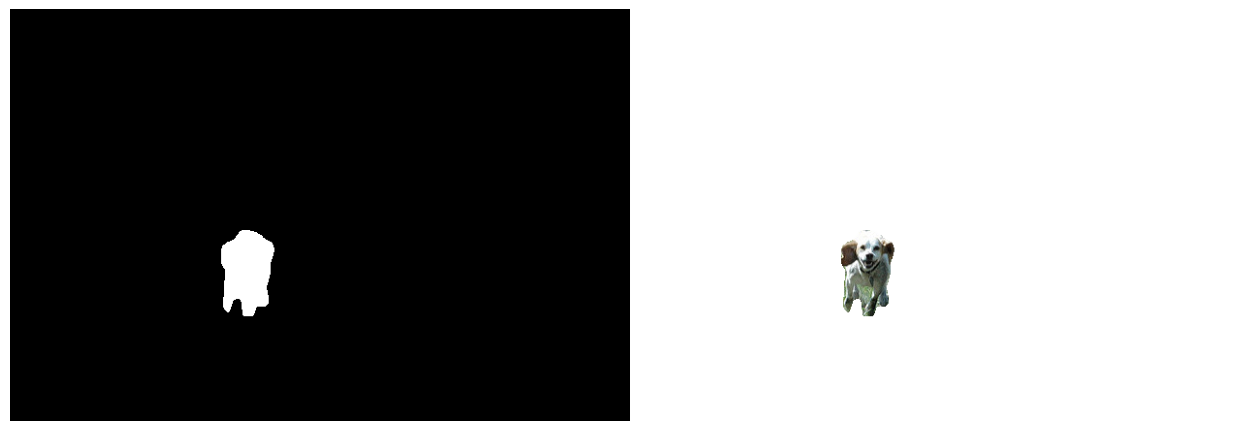

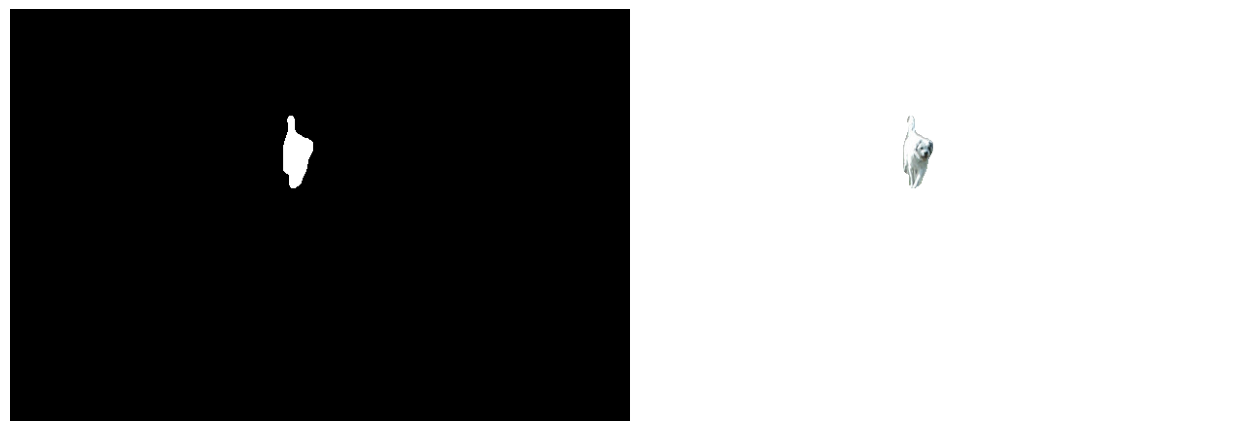

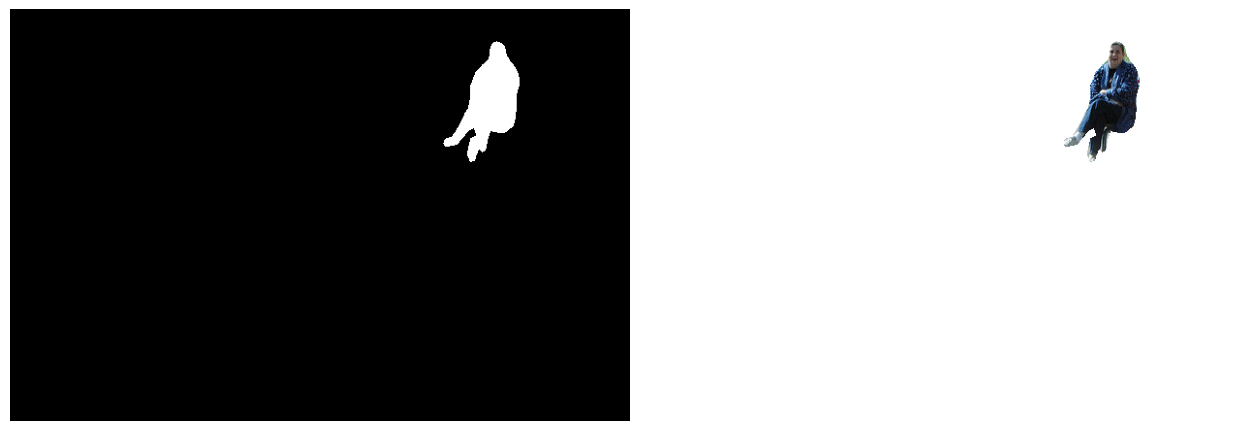

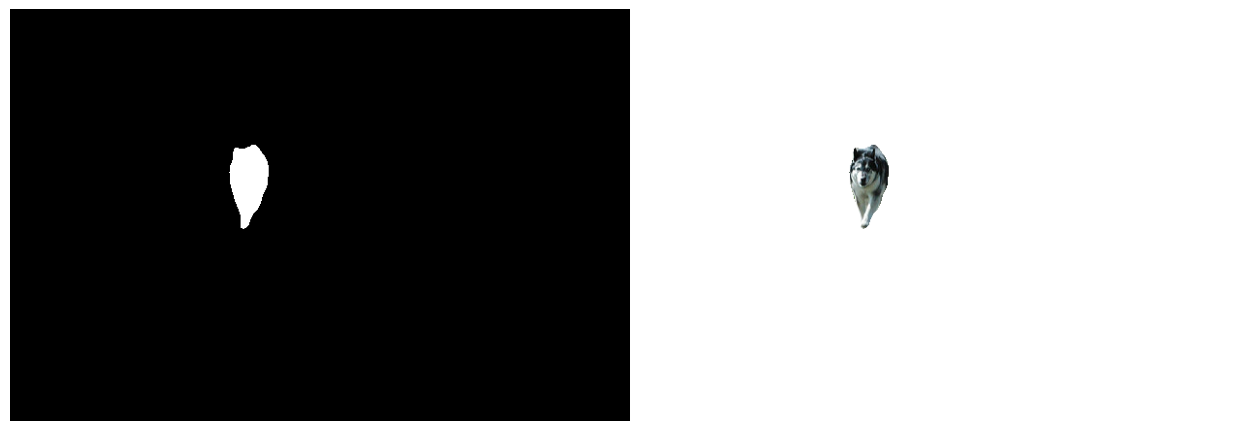

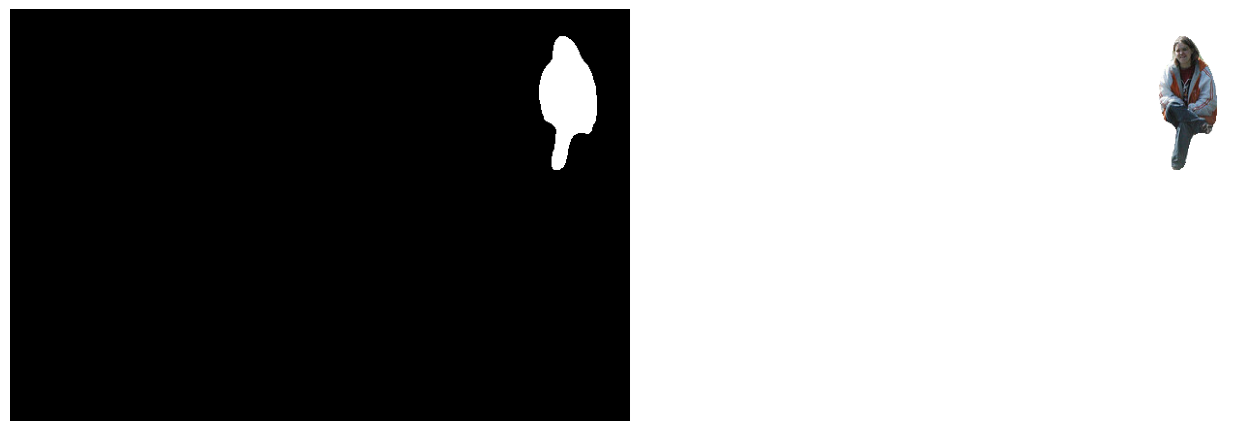

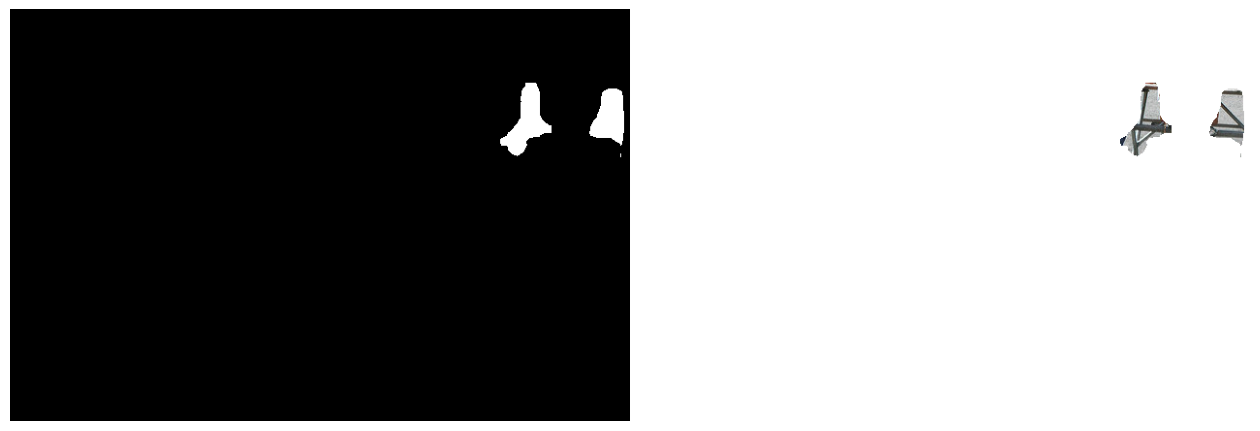

In [49]:
for index in range(len(r['rois'])):
  show_segment(image, r, index, True)

## Segmentation in videos


In [50]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [51]:
capture = cv2.VideoCapture('/content/drive/MyDrive/Computer Vision Masterclass/Videos/video_street2.mp4')
connected, frame = capture.read()
connected

True

In [52]:
frame.shape

(720, 1280, 3)

In [53]:
save_video = cv2.VideoWriter('/content/drive/MyDrive/Cursos - recursos/Computer Vision Masterclass/Videos/video_street2_result_seg.avi',
                             cv2.VideoWriter_fourcc(*'XVID'), 24, (frame.shape[1], frame.shape[0]))

In [54]:
!cp "/content/drive/MyDrive/Computer Vision Masterclass/PyCharm/video_functions.py" ./Mask_RCNN-TF2/mrcnn

In [56]:
from mrcnn import video_functions

ImportError: cannot import name 'video_functions' from 'mrcnn' (/usr/local/lib/python3.10/dist-packages/mask_rcnn-2.1-py3.10.egg/mrcnn/__init__.py)

In [57]:
pwd

'/content'

In [58]:
pwd

'/content'

In [59]:
%cd Mask_RCNN-TF2

/content/Mask_RCNN-TF2


In [60]:
from mrcnn import visualize

In [61]:
os.listdir('./mrcnn')

['utils.py',
 '__init__.py',
 'parallel_model.py',
 'video_functions.py',
 'config.py',
 'model.py',
 'visualize.py']

In [62]:
import sys

# Add the directory containing the file to sys.path
sys.path.append('/content/drive/MyDrive/Computer Vision Masterclass/PyCharm')

# Now you can import the module
import video_functions


In [63]:
colors = video_functions.random_colors(len(class_names), 55)
len(colors)

81

In [64]:
print(colors)

[(0.518518518518519, 0.0, 1.0), (1.0, 0.0, 0.14814814814814792), (0.37037037037037046, 1.0, 0.0), (0.0, 1.0, 0.5185185185185182), (1.0, 0.0, 0.5925925925925926), (1.0, 0.0, 0.518518518518519), (1.0, 0.0, 0.7407407407407405), (1.0, 0.5925925925925926, 0.0), (0.0, 1.0, 0.2962962962962963), (0.0, 1.0, 0.7407407407407405), (0.6666666666666667, 1.0, 0.0), (1.0, 0.07407407407407407, 0.0), (0.5925925925925926, 0.0, 1.0), (0.0, 0.5185185185185182, 1.0), (0.0, 1.0, 0.4444444444444442), (0.8888888888888884, 0.0, 1.0), (0.8888888888888888, 1.0, 0.0), (0.0, 0.8888888888888893, 1.0), (1.0, 0.2962962962962963, 0.0), (0.0, 0.2962962962962967, 1.0), (0.0740740740740744, 0.0, 1.0), (0.9629629629629628, 0.0, 1.0), (0.22222222222222232, 0.0, 1.0), (0.7407407407407409, 1.0, 0.0), (1.0, 0.6666666666666666, 0.0), (0.0, 1.0, 0.22222222222222232), (0.0, 1.0, 0.07407407407407396), (0.0, 1.0, 0.5925925925925926), (0.0, 0.44444444444444464, 1.0), (0.0, 0.8148148148148149, 1.0), (1.0, 0.5185185185185185, 0.0), (0

In [65]:
def show(img):
  fig = plt.gcf()
  fig.set_size_inches(16,10)
  plt.axis('off')
  plt.imshow(img)
  plt.show()

In [66]:
frame_show = 20
current_frame = 0

In [67]:
while (cv2.waitKey(1) < 0):
  connected, frame = capture.read()

  if not connected:
    break

  results = network.detect([frame], verbose=0)
  r = results[0]

  processed_frame = video_functions.display_instances(frame, r['rois'], r['masks'],
                                                      r['class_ids'], class_names, r['scores'], colors=colors)

  if current_frame <= frame_show:
    show(processed_frame)
    current_frame += 1

  save_video.write(cv2.cvtColor(processed_frame, cv2.COLOR_BGR2RGB))
save_video.release()

Output hidden; open in https://colab.research.google.com to view.

In [68]:
images = [os.path.join('/content/Mask_RCNN-TF2/images', f) for f in os.listdir('/content/Mask_RCNN-TF2/images')]
images

['/content/Mask_RCNN-TF2/images/8053677163_d4c8f416be_z.jpg',
 '/content/Mask_RCNN-TF2/images/3878153025_8fde829928_z.jpg',
 '/content/Mask_RCNN-TF2/images/6821351586_59aa0dc110_z.jpg',
 '/content/Mask_RCNN-TF2/images/262985539_1709e54576_z.jpg',
 '/content/Mask_RCNN-TF2/images/2516944023_d00345997d_z.jpg',
 '/content/Mask_RCNN-TF2/images/6584515005_fce9cec486_z.jpg',
 '/content/Mask_RCNN-TF2/images/2383514521_1fc8d7b0de_z.jpg',
 '/content/Mask_RCNN-TF2/images/2502287818_41e4b0c4fb_z.jpg',
 '/content/Mask_RCNN-TF2/images/5951960966_d4e1cda5d0_z.jpg',
 '/content/Mask_RCNN-TF2/images/9118579087_f9ffa19e63_z.jpg',
 '/content/Mask_RCNN-TF2/images/3862500489_6fd195d183_z.jpg',
 '/content/Mask_RCNN-TF2/images/25691390_f9944f61b5_z.jpg',
 '/content/Mask_RCNN-TF2/images/3132016470_c27baa00e8_z.jpg',
 '/content/Mask_RCNN-TF2/images/1045023827_4ec3e8ba5c_z.jpg',
 '/content/Mask_RCNN-TF2/images/4410436637_7b0ca36ee7_z.jpg',
 '/content/Mask_RCNN-TF2/images/4782628554_668bc31826_z.jpg',
 '/content/

In [ ]:
for image in images:
  #try:
  current_image = skimage.io.imread(image)
  (H, W) = current_image.shape[:2]
  #except:
  #  continue

  results = network.detect([current_image], verbose=0)
  r = results[0]
  visualize.display_instances(current_image, r['rois'], r['masks'],
                              r['class_ids'], class_names, r['scores'])

Output hidden; open in https://colab.research.google.com to view.